In [135]:
from keras.models import load_model
from keras.layers import Dense, Flatten
from keras import Model
import pandas as pd
import numpy as np
import pickle

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [129]:
from keras import backend as K
def correlation_coefficient_loss(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    r = K.maximum(K.minimum(r, 1.0), -1.0)
    return 1 - K.square(r)

In [179]:
def reshape_model(model):
    model.pop()
    model.pop()
    for layer in model.layers:
        layer.trainable = False

    dense1 = Dense(150, activation='relu')
    dense3 = Dense(80, activation='relu')
    dense4 = Dense(30, activation='relu')
    dense2 = Dense(7, activation='softmax')

    model.add(dense1)
    model.add(dense3)
    model.add(dense4)
    model.add(Flatten())
    model.add(dense2)

#     model.compile(loss=correlation_coefficient_loss, optimizer='adam', metrics=['acc'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])    

In [180]:
# model = load_model('pickles/train_3_65-mine.h5')
# model = load_model('pickles/train_3_6715-mine.h5')
model = load_model('pickles/train3_weights-05-0.67.hdf5')

In [181]:
reshape_model(model)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 32, 342)           12922470  
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 342)           0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 32, 300)           591600    
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 300)           0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 32, 300)           541200    
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 300)           0         
_________________________________________________________________
dense_17 (Dense)             (None, 32, 150)           45150     
__________

In [172]:
tweets = pd.read_feather('pickles/train_7.feather')
tweets.head(5)

/home/epita/.local/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


,ID,Class,Tweet,Sentiment
0,0,0,yeah playing well,3
1,1,0,least not guy try discourage anymore want neve...,3
2,2,0,uplift still discourage mean listen wrong voic...,3
3,3,0,... age heyday blood tame ...,3
4,4,-2,embarrass saw u like knvfkkjg think stalker n ...,1


In [173]:
train_tweets, sentiments = tweets['Tweet'], tweets['Sentiment']

tokenizer = pickle.load(open("pickles/tokenizer.pickle", 'rb'))
sequences = tokenizer.texts_to_sequences(train_tweets)

MAX_SEQUENCE_LENGTH = 32

train_sequences = pad_sequences(sequences, MAX_SEQUENCE_LENGTH)
targets = to_categorical(sentiments, 7)

In [174]:
np.argmax(to_categorical(sentiments, 7) ,axis=1)[:10], np.array(sentiments[:10])

(array([3, 3, 3, 3, 1, 0, 0, 4, 4, 1]), array([3, 3, 3, 3, 1, 0, 0, 4, 4, 1]))

In [175]:
train_sequences.shape, targets.shape

((1630, 32), (1630, 7))

In [177]:
X_train, X_val, y_train, y_val = train_test_split(train_sequences, targets, test_size=0.1)

print('training set: ' + str(len(X_train)) + ' samples')
print('validation set: ' + str(len(X_val)) + ' samples')

print('x_train:', X_train.shape)
print('y_train:', y_train.shape)

training set: 1467 samples
validation set: 163 samples
x_train: (1467, 32)
y_train: (1467, 7)


In [182]:
model.fit(X_train, y_train, batch_size=128, validation_data=(X_val, y_val), epochs=5)

Train on 1467 samples, validate on 163 samples
Epoch 1/5
1467/1467 [==============================] - 6s 4ms/step - loss: 1.8999 - acc: 0.2284 - val_loss: 1.8340 - val_acc: 0.3067
Epoch 2/5
1467/1467 [==============================] - 3s 2ms/step - loss: 1.7286 - acc: 0.3292 - val_loss: 1.6750 - val_acc: 0.3252
Epoch 3/5
1467/1467 [==============================] - 2s 2ms/step - loss: 1.6244 - acc: 0.3347 - val_loss: 1.6050 - val_acc: 0.3558
Epoch 4/5
1467/1467 [==============================] - 3s 2ms/step - loss: 1.5959 - acc: 0.3545 - val_loss: 1.6132 - val_acc: 0.3558
Epoch 5/5
1467/1467 [==============================] - 3s 2ms/step - loss: 1.5987 - acc: 0.3592 - val_loss: 1.6099 - val_acc: 0.3681


In [195]:
model.save('pickles/train7_0.3681-0.59p_dev.hdf5')

In [196]:
model.fit(X_train, y_train, batch_size=128, validation_data=(X_val, y_val), epochs=30)

Train on 1467 samples, validate on 163 samples
Epoch 1/30
1467/1467 [==============================] - 3s 2ms/step - loss: 1.5907 - acc: 0.3476 - val_loss: 1.6016 - val_acc: 0.3926
Epoch 2/30
1467/1467 [==============================] - 2s 2ms/step - loss: 1.5822 - acc: 0.3606 - val_loss: 1.5998 - val_acc: 0.3742
Epoch 3/30
1467/1467 [==============================] - 3s 2ms/step - loss: 1.5693 - acc: 0.3592 - val_loss: 1.5968 - val_acc: 0.3620
Epoch 4/30
1467/1467 [==============================] - 3s 2ms/step - loss: 1.5631 - acc: 0.3729 - val_loss: 1.6005 - val_acc: 0.3988
Epoch 5/30
1467/1467 [==============================] - 3s 2ms/step - loss: 1.5602 - acc: 0.3851 - val_loss: 1.5964 - val_acc: 0.3252
Epoch 6/30
1467/1467 [==============================] - 2s 2ms/step - loss: 1.5567 - acc: 0.3763 - val_loss: 1.5864 - val_acc: 0.3681
Epoch 7/30
1467/1467 [==============================] - 2s 2ms/step - loss: 1.5567 - acc: 0.3654 - val_loss: 1.5827 - val_acc: 0.3558
Epoch 8/30
1467

# Model evaluation

In [187]:
dev_7 = pd.read_feather('pickles/dev_7.feather')

dev_x, dev_y = dev_7['Tweet'], dev_7['Target_from_0']

dev_sequences = tokenizer.texts_to_sequences(dev_x)
dev_sequences = pad_sequences(dev_sequences, MAX_SEQUENCE_LENGTH)

/home/epita/.local/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [188]:
dev_y.unique()

array([0, 1, 6, 4, 5, 2, 3])

In [197]:
y_pred = np.argmax(model.predict(dev_sequences, batch_size=128), axis=1)
y_true = dev_y # np.argmax(y_val, axis=1)

In [198]:
y_pred[:10], np.array(y_true[:10])

(array([0, 3, 3, 6, 5, 3, 4, 1, 0, 3]), array([0, 1, 0, 6, 4, 6, 5, 4, 1, 4]))

In [199]:
from scipy.stats import pearsonr
from sklearn.metrics import cohen_kappa_score


p = pearsonr(y_true, y_pred)[0]
w = cohen_kappa_score(y_pred, y_true, weights='quadratic')

print(f'Pearson: {p}')
print(f'Quadratic kappa: {w}')

Pearson: 0.6622257781324817
Quadratic kappa: 0.6551798484766569


In [200]:
model.save('pickles/train7_0.33-0.66p_dev.hdf5')

In [201]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_true, y_pred)
cm

array([[31, 30,  0,  7,  1,  0,  0],
       [ 8, 69,  0, 16,  0,  0,  2],
       [ 4, 19,  1, 10,  0,  0,  0],
       [ 2, 51,  0, 38,  4,  0, 10],
       [ 1, 13,  0, 19, 10,  1, 14],
       [ 0,  5,  0,  9,  2,  1, 18],
       [ 0,  4,  0, 14,  4,  0, 31]])

In [202]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

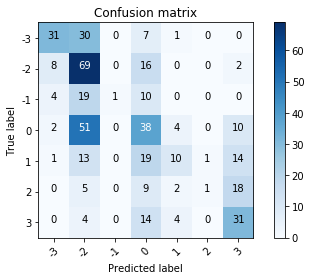

In [203]:
plot_confusion_matrix(cm, [-3, -2, -1, 0, 1, 2, 3])

## Class distribution

Sentiment,-3,-2,-1,0,1,2,3
ID,198,344,112,446,225,127,178
Class,198,344,112,446,225,127,178
Tweet,198,344,112,446,225,127,178


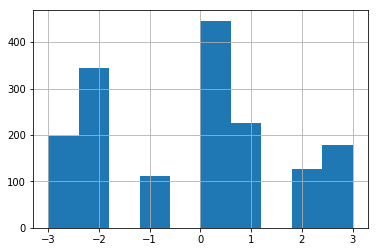

In [72]:
display(tweets.groupby('Sentiment').count().T)
sentiments.hist()

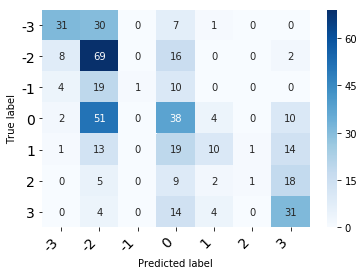

In [204]:
import seaborn as sns

def plot_cm(cm, class_names):
    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

    fig = plt.figure()
    
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap=plt.cm.Blues)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_cm(cm, [-3, -2, -1, 0, 1, 2, 3])

In [ ]:
output_file = dev_7.assign(ic=pd.Series(y_pred).values)
output_file = output_file[['ID', 'Tweet', 'Affect Dimension', 'ic']]
output_file = output_file.rename(index=str, columns={"ic": "Intensity Class"})

file = open('test_output.tsv', 'w')
output_file.to_csv(path_or_buf=file, sep='\t'))
file.close()